In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import time
import warnings
warnings.filterwarnings("ignore")

# Task 1: Load and preprocess the dataset.

### 1. Load the LFW People dataset (fetch_lfw_people), use load_faces function for that.

In [53]:
from utils import load_faces, pca_faces, plot_pca_faces

In [54]:
faces_dataset = load_faces()

In [55]:
faces_dataset

{'data': array([[0.30718955, 0.32418302, 0.34640524, ..., 0.61045754, 0.5777778 ,
         0.4392157 ],
        [0.10196079, 0.16601308, 0.25751635, ..., 0.43137255, 0.52156866,
         0.6013072 ],
        [0.38562092, 0.32941177, 0.23006536, ..., 0.16470589, 0.16209151,
         0.3150327 ],
        ...,
        [0.19477125, 0.19607843, 0.2248366 , ..., 0.65228766, 0.6562092 ,
         0.5411765 ],
        [0.4862745 , 0.5660131 , 0.6156863 , ..., 0.87973857, 0.8784314 ,
         0.89803916],
        [0.12810458, 0.10980392, 0.09411765, ..., 0.14901961, 0.20392157,
         0.3385621 ]], dtype=float32),
 'images': array([[[0.30718955, 0.32418302, 0.34640524, ..., 0.27320263,
          0.29411766, 0.29673204],
         [0.33464053, 0.32026145, 0.351634  , ..., 0.2248366 ,
          0.29150328, 0.32156864],
         [0.34640524, 0.34640524, 0.37254903, ..., 0.18039216,
          0.25620916, 0.3124183 ],
         ...,
         [0.18692811, 0.19215687, 0.18954249, ..., 0.5673203 ,
     

In [6]:
len(faces_dataset.target_names)

12

In [7]:
faces_dataset.target.shape

(1560,)

In [8]:
X = faces_dataset.data
y = faces_dataset.target

In [9]:
features = pd.DataFrame(X)
features

,0,1,2,3,4,5,6,7,8,9,...,5645,5646,5647,5648,5649,5650,5651,5652,5653,5654
0,0.307190,0.324183,0.346405,0.394771,0.460131,0.457516,0.385621,0.333333,0.377778,0.460131,...,0.449673,0.423529,0.411765,0.386928,0.355556,0.403922,0.529412,0.610458,0.577778,0.439216
1,0.101961,0.166013,0.257516,0.318954,0.329412,0.349020,0.371242,0.386928,0.375163,0.345098,...,0.253595,0.287582,0.324183,0.318954,0.284967,0.294118,0.354248,0.431373,0.521569,0.601307
2,0.385621,0.329412,0.230065,0.205229,0.247059,0.270588,0.258824,0.269281,0.301961,0.316340,...,0.671895,0.696732,0.688889,0.699346,0.725490,0.724183,0.534641,0.164706,0.162092,0.315033
3,0.547712,0.559477,0.558170,0.518954,0.435294,0.347712,0.350327,0.393464,0.390850,0.381699,...,0.410458,0.416993,0.428758,0.444444,0.464052,0.466667,0.437909,0.418301,0.427451,0.484967
4,0.359477,0.356863,0.371242,0.424837,0.371242,0.291503,0.383007,0.507190,0.588235,0.627451,...,0.430065,0.566013,0.708497,0.806536,0.866667,0.887582,0.913726,0.930719,0.945098,0.938562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0.354248,0.356863,0.339869,0.318954,0.308497,0.317647,0.356863,0.432680,0.517647,0.589542,...,0.190850,0.181699,0.179085,0.181699,0.193464,0.207843,0.220915,0.218301,0.196078,0.158170
1556,0.359477,0.328105,0.296732,0.298039,0.324183,0.346405,0.366013,0.379085,0.386928,0.409150,...,0.968627,0.975163,0.981699,0.985621,0.989542,0.959477,0.816993,0.543791,0.360784,0.277124
1557,0.194771,0.196078,0.224837,0.286275,0.347712,0.341176,0.277124,0.267974,0.318954,0.415686,...,0.637909,0.667974,0.708497,0.777778,0.755556,0.733333,0.683660,0.652288,0.656209,0.541176
1558,0.486275,0.566013,0.615686,0.653595,0.673203,0.696732,0.696732,0.688889,0.716340,0.712418,...,0.844444,0.879739,0.908497,0.916340,0.916340,0.928105,0.899346,0.879739,0.878431,0.898039


### 2. Split the dataset into training and test sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(1248, 5655)

In [41]:
X

array([[0.30718955, 0.32418302, 0.34640524, ..., 0.61045754, 0.5777778 ,
        0.4392157 ],
       [0.10196079, 0.16601308, 0.25751635, ..., 0.43137255, 0.52156866,
        0.6013072 ],
       [0.38562092, 0.32941177, 0.23006536, ..., 0.16470589, 0.16209151,
        0.3150327 ],
       ...,
       [0.19477125, 0.19607843, 0.2248366 , ..., 0.65228766, 0.6562092 ,
        0.5411765 ],
       [0.4862745 , 0.5660131 , 0.6156863 , ..., 0.87973857, 0.8784314 ,
        0.89803916],
       [0.12810458, 0.10980392, 0.09411765, ..., 0.14901961, 0.20392157,
        0.3385621 ]], dtype=float32)

### 3. Visualize some examples from training set with their corresponding label names.

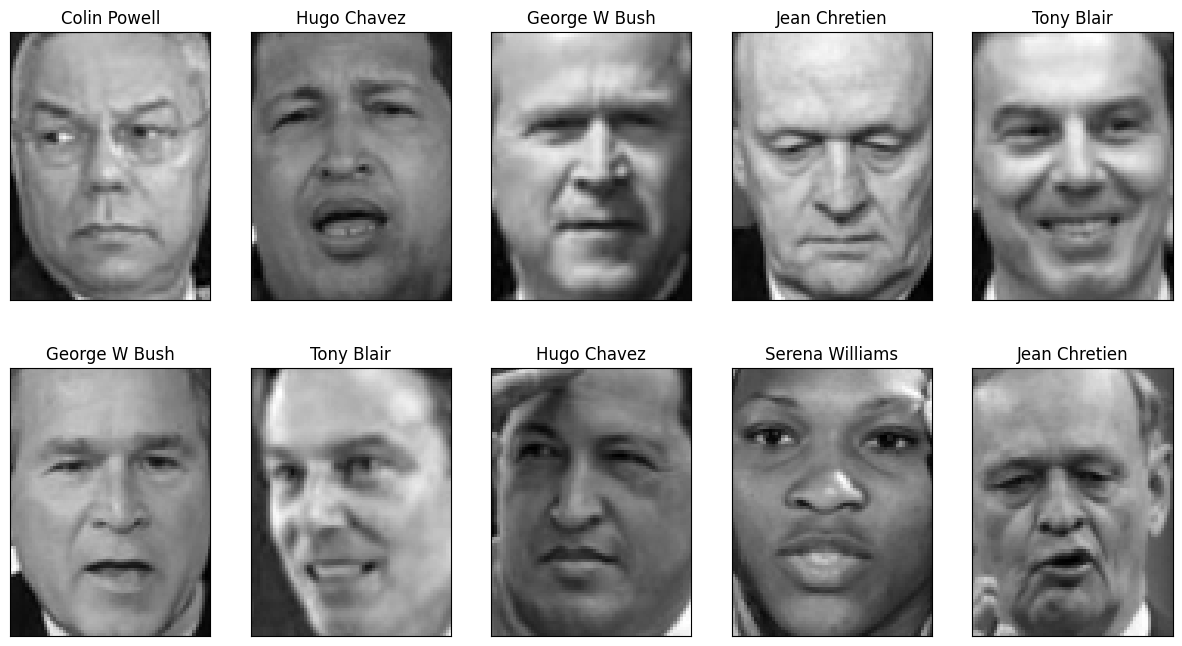

In [63]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

num_images = len(X_train)
random_indices = np.random.choice(num_images, 10, replace=False)

for index, ax in zip(random_indices, axes.ravel()):
    ax.imshow(X_train[index].reshape(87,65), cmap="gray")
    ax.set_title(faces_dataset.target_names[y_train[index]])

### 4. Normalize the feature values by scaling them.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.6292314 ,  0.7379872 ,  0.7633928 , ..., -1.4116777 ,
        -1.3406831 , -1.2825261 ],
       [ 0.38047543,  0.2760413 ,  0.09086505, ...,  1.5138028 ,
         1.0198632 , -0.27723813],
       [-0.6352775 , -0.5358634 , -0.64605343, ...,  0.60964245,
         0.15360762, -0.52094436],
       ...,
       [ 1.4929668 ,  1.6128845 ,  1.5647022 , ..., -0.6031497 ,
        -0.5350654 , -0.49918482],
       [ 1.1060133 ,  1.1859347 ,  0.92794746, ..., -1.1986784 ,
        -1.1501068 , -0.39038742],
       [ 0.67760044,  0.7309882 ,  0.8206292 , ...,  1.092151  ,
         1.1324763 ,  1.1023132 ]], dtype=float32)

In [13]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[ 0.4437332 ,  0.42583394,  0.35832095, ..., -1.3131509 ,
        -1.2454865 , -1.2144861 ],
       [ 0.99247   ,  1.0429027 ,  1.214638  , ...,  0.22745897,
        -0.4861514 , -0.8512595 ],
       [-0.57217115, -0.57975936, -0.7081833 , ..., -1.1272864 ,
        -1.0617764 , -1.0493832 ],
       ...,
       [-1.5361679 , -1.547262  , -1.6812711 , ..., -1.0942439 ,
        -1.1556727 , -1.1855931 ],
       [-0.9132776 , -0.95304775, -0.94172436, ..., -0.39621958,
        -1.2209918 , -1.2227414 ],
       [-0.4312792 , -0.6635588 , -0.715968  , ...,  0.9048316 ,
         0.9631173 ,  1.0309149 ]], dtype=float32)

# Task 2: Determine the optimal number of components.

### 1. Perform PCA on the training data without reducing the number of components.

In [14]:
pca = PCA(random_state=42)
pca.fit(X_train_scaled)
X_pca = pca.transform(X_train_scaled)

### 2. Calculate the explained variance ratios and their cumulative sum (use explained_variance_ of PCA and np.cumsum).

In [15]:
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

### 3. Plot explained variance cumulative sum graph.

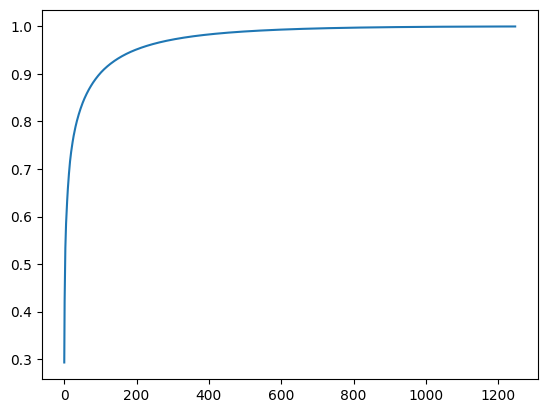

In [16]:
plt.plot(cumulative_explained_variance)

### 4. Determine the optimal number of components to retain by selecting the smallest number of components that explain at least 95% of the total variance.

In [17]:
optimal_num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
optimal_num_components

196

### 5. Reconstruct faces using only optimal number of components and plot several examples, comparing original images with reconstructed ones.

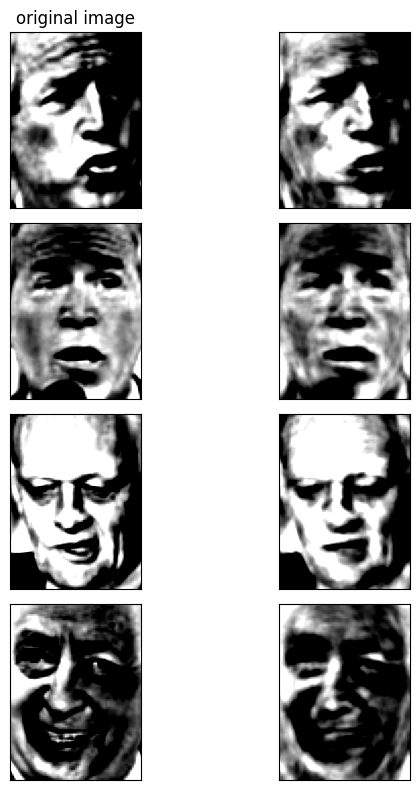

In [18]:
plot_pca_faces(X_train_scaled, image_shape, optimal_num_components)

# Task 3: Train a classifier.

### 1. Perform PCA on the training data with the optimal number of components.

In [19]:
pca_optimal = PCA(n_components=optimal_num_components, random_state=42)
pca_optimal.fit(X_train_scaled)
X_pca_optimal = pca.transform(X_train_scaled)

### 2. Train a classifier of your choice using the PCA-transformed data. You can use any classifier, but make sure to use the same classifier with the same hyperparameters for all experiments to ensure a fair comparison.

In [20]:
start_time_optimal = time.time()
model_RF = RandomForestClassifier()
optimal_model_RF = GridSearchCV(model_RF, param_grid = {"n_estimators": np.arange(2,10,1), "min_samples_leaf":np.arange(2,10,1), "criterion": ['gini', 'entropy'], "max_leaf_nodes": np.arange(2,10,1)}, cv = 5)
optimal_model_RF.fit(X_pca_optimal,y_train)
training_time_optimal = time.time() - start_time_optimal

### 3. Evaluate the classifier on the test set and report the chosen classification metric(s) and explain why you chose that particular metric(s).

In [28]:
start_time_optimal = time.time()
X_test_pca_optimal = pca.transform(X_test_scaled)
y_predict_RF = optimal_model_RF.predict(X_test_pca_optimal)
inference_time_optimal = (time.time() - start_time_optimal) / len(y_test)

print("Classification Report")
print(classification_report(y_test, y_predict_RF))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.50      0.11      0.18        55
           2       0.00      0.00      0.00        25
           3       0.35      0.98      0.52       107
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        33

    accuracy                           0.36       312
   macro avg       0.07      0.09      0.06       312
weighted avg       0.21      0.36      0.21       312



As we know, precision shows what percent of the predicted specific class is actually that particular class, and recall shows what percent of a specific class is actually predicted as that class. It is crucial to take into account these two metrics, which is why the F1 score is selected as the evaluation metric because the F1 score is the harmonic mean of precision and recall.

### 4. Report training and mean inference time.

In [29]:
print(f"Training time: {training_time_optimal:.2f} seconds")
print(f"Mean inference time: {inference_time_optimal:.5f} seconds")

Training time: 921.00 seconds
Mean inference time: 0.00012 seconds


# Task 4: Compare classifier performance with different numbers of components. 

### 1. Repeat steps 1-4 of Task 3 for a smaller and a larger number of components than the optimal value determined in Task 2.

### 1. Perform PCA on the training data with the smaller number of components than the optimal value determined in Task 2

In [33]:
pca_lower = PCA(n_components=100, random_state=42)
pca_lower.fit(X_train_scaled)
X_pca_lower = pca.transform(X_train_scaled)

### 2. Train a classifier using the PCA-transformed data with smaller number of components.

In [34]:
start_time_lower = time.time()
model_RF = RandomForestClassifier()
lower_model_RF = GridSearchCV(model_RF, param_grid = {"n_estimators": np.arange(2,10,1), "min_samples_leaf":np.arange(2,10,1), "criterion": ['gini', 'entropy'], "max_leaf_nodes": np.arange(2,10,1)}, cv = 5)
lower_model_RF.fit(X_pca_lower,y_train)
training_time_lower = time.time() - start_time_lower

### 3. Evaluate the classifier on the test set with smaller number of components.

In [35]:
start_time_lower = time.time()
X_test_pca_lower = pca.transform(X_test_scaled)
y_predict_RF = lower_model_RF.predict(X_test_pca_lower)
inference_time_lower = (time.time() - start_time_lower) / len(y_test)

print("Classification Report")
print(classification_report(y_test, y_predict_RF))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.35      0.29      0.32        55
           2       0.00      0.00      0.00        25
           3       0.38      0.93      0.54       107
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        33

    accuracy                           0.37       312
   macro avg       0.06      0.10      0.07       312
weighted avg       0.19      0.37      0.24       312



### 4. Report training and mean inference time with smaller number of components.

In [36]:
print(f"Training time: {training_time_lower:.2f} seconds")
print(f"Mean inference time: {inference_time_lower:.5f} seconds")

Training time: 946.28 seconds
Mean inference time: 0.00012 seconds


### 1. Perform PCA on the training data with the larger number of components than the optimal value determined in Task 2

In [37]:
pca_higher = PCA(n_components=220, random_state=42)
pca_higher.fit(X_train_scaled)
X_pca_higher = pca.transform(X_train_scaled)

### 2. Train a classifier using the PCA-transformed data with larger number of components.

In [38]:
start_time_higher = time.time()
model_RF = RandomForestClassifier()
higher_model_RF = GridSearchCV(model_RF, param_grid = {"n_estimators": np.arange(2,10,1), "min_samples_leaf":np.arange(2,10,1), "criterion": ['gini', 'entropy'], "max_leaf_nodes": np.arange(2,10,1)}, cv = 5)
higher_model_RF.fit(X_pca_higher,y_train)
training_time_higher = time.time() - start_time_higher

### 3. Evaluate the classifier on the test set with larger number of components.

In [39]:
start_time_higher = time.time()
X_test_pca_higher = pca.transform(X_test_scaled)
y_predict_RF = higher_model_RF.predict(X_test_pca_higher)
inference_time_higher = (time.time() - start_time_higher) / len(y_test)

print("Classification Report")
print(classification_report(y_test, y_predict_RF))

Classification Report
              precision    recall  f1-score   support

           0       0.12      0.09      0.11        11
           1       0.36      0.31      0.33        55
           2       0.00      0.00      0.00        25
           3       0.39      0.85      0.54       107
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        33

    accuracy                           0.35       312
   macro avg       0.07      0.10      0.08       312
weighted avg       0.20      0.35      0.25       312



### 4. Report training and mean inference time with larger number of components.

In [40]:
print(f"Training time: {training_time_higher:.2f} seconds")
print(f"Mean inference time: {inference_time_higher:.5f} seconds")

Training time: 1265.43 seconds
Mean inference time: 0.00017 seconds


### 2. Repeat steps 1-4 of Task 3 using the full set of features (i.e., without PCA).

### 2. Train a classifier using the full set of features (i.e., without PCA).

In [39]:
start_time = time.time()
model_RF = RandomForestClassifier()
model_RF = GridSearchCV(model_RF, param_grid = {"n_estimators": np.arange(2,10,1), "min_samples_leaf":np.arange(2,10,1), "criterion": ['gini', 'entropy'], "max_leaf_nodes": np.arange(2,10,1)}, cv = 5)
model_RF.fit(X_train,y_train)
training_time = time.time() - start_time

### 3. Evaluate the classifier on the test set.

In [41]:
start_time = time.time()
y_predict_RF = model_RF.predict(X_test)
inference_time = (time.time() - start_time) / len(y_test)

print("Classification Report")
print(classification_report(y_test, y_predict_RF))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.46      0.38      0.42        55
           2       0.50      0.04      0.07        25
           3       0.40      0.95      0.56       107
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         8
          10       0.33      0.29      0.31         7
          11       0.00      0.00      0.00        33

    accuracy                           0.40       312
   macro avg       0.14      0.14      0.11       312
weighted avg       0.26      0.40      0.28       312



### 4. Report training and mean inference time.

In [42]:
print(f"Training time: {training_time:.2f} seconds")
print(f"Mean inference time: {inference_time:.5f} seconds")

Training time: 1396.24 seconds
Mean inference time: 0.00001 seconds


# Task 5: Analyze the results.

### 1. Compare the classifier performance, training time, and inference time for the different numbers of components and the full set of features. Comment on overfitting.

Random forest was used as a classifier, and according to the results, the training time for the different number of components with PCA is different; for example, in the case of the higher number of components, it takes about 37 percent longer than the training with the optimal number of components. In contrast, the inference time is approximately the same for the lower, optimal, and higher number of components. For evaluating the classifier performance, the average F1 score is selected. There is only a 0.02 difference between the classifier with the optimal and higher number of components. When comparing the classifier with the full set of features with the one with the optimal number of components, there is almost an 83.3 percent increase in classifier performance and a 51.6 percent increase in training time. Using the higher number of components or the full set of features might result in overfitting.

### 2. Discuss the trade-offs between component number, model performance, and computation time.

One of the primary trade-offs in PCA is between the number of components used and the model's performance. Using more components can lead to a better model fit, but it can also result in overfitting, where the model is too complex and doesn't generalize well to new data. In contrast, using fewer components can result in a simpler model, but it may not capture all the important features of the data, leading to underfitting. So, it's essential to find the optimal number of components that balances between model complexity and performance.
Another trade-off is between the number of components used and computation time. PCA involves computing the eigenvectors and eigenvalues of the data, which can be computationally intensive, especially when dealing with large datasets. Using a smaller number of components can reduce the computation time, but it may also result in a loss of information.

### 3. Provide a conclusion on the optimal number of components for this classification task based on your analysis.

In this specific case, the classifier's performance with the lower number of components is higher than the one with the optimal number of components, and the difference is 14.28 percent. The inference time for these two models is the same, and the training time of the lower number of components is higher than the optimal number of components. So, in this particular case, keeping up with the classifier with the lower number of components might be recommended.